In [26]:
import numpy  as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [27]:
train_ds=pd.read_csv('./titanic/train.csv')
test_ds=pd.read_csv('./titanic/test.csv')

In [28]:
train_ds.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test_ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
Numeric_cols=train_ds.select_dtypes(include=['number']).columns.tolist()
categorical_cols=train_ds.select_dtypes(include=['object','category']).columns.tolist()


In [31]:
for col in Numeric_cols:
    print(col,"(Nan count)=>",train_ds[col].isna().sum())

PassengerId (Nan count)=> 0
Survived (Nan count)=> 0
Pclass (Nan count)=> 0
Age (Nan count)=> 177
SibSp (Nan count)=> 0
Parch (Nan count)=> 0
Fare (Nan count)=> 0


In [32]:
for col in categorical_cols:
    print(col,"(Nan count)=>",train_ds[col].isna().sum())

Name (Nan count)=> 0
Sex (Nan count)=> 0
Ticket (Nan count)=> 0
Cabin (Nan count)=> 687
Embarked (Nan count)=> 2


In [33]:
PassengerId=test_ds['PassengerId']
## Drop ID, Ticket, Cabin & Name 
test_ds=test_ds.drop(columns='PassengerId',axis=1)
train_ds=train_ds.drop(columns='PassengerId',axis=1)

test_ds=test_ds.drop(columns='Name',axis=1)
train_ds=train_ds.drop(columns='Name',axis=1)

test_ds=test_ds.drop(columns='Ticket',axis=1)
train_ds=train_ds.drop(columns='Ticket',axis=1)

test_ds=test_ds.drop(columns='Cabin',axis=1)
train_ds=train_ds.drop(columns='Cabin',axis=1)

In [34]:
train_ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## **fill Nan values**

In [35]:
test_ds.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [36]:
train_ds.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [37]:
train_ds['Embarked']=train_ds['Embarked'].ffill()
train_ds['Age']=train_ds['Age'].fillna(train_ds['Age'].mean())
#train_ds['Cabin']=train_ds['Cabin'].fillna(0)

In [38]:
test_ds['Age']=test_ds['Age'].fillna(test_ds['Age'].mean())
test_ds['Fare']=test_ds['Fare'].fillna(test_ds['Fare'].mean())

#test_ds['Cabin']=test_ds['Cabin'].fillna(0)

In [39]:
train_ds.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
test_ds.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## **Set Target**

In [41]:
target=train_ds['Survived']
train_ds=train_ds.drop(columns='Survived',axis=1)

## **Data Encoding**

In [42]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
data=ohe.fit_transform(train_ds[['Sex']])
train_ds=pd.concat([train_ds,data], axis=1)
train_ds=train_ds.drop(columns='Sex', axis=1)

data=ohe.fit_transform(test_ds[['Sex']])
test_ds=pd.concat([test_ds,data], axis=1)
test_ds=test_ds.drop(columns='Sex', axis=1)


In [43]:
ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
data=ohe.fit_transform(train_ds[['Embarked']])
train_ds=pd.concat([train_ds,data], axis=1)
train_ds=train_ds.drop(columns='Embarked', axis=1)

data=ohe.fit_transform(test_ds[['Embarked']])
test_ds=pd.concat([test_ds,data], axis=1)
test_ds=test_ds.drop(columns='Embarked', axis=1)

In [44]:
train_ds.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [45]:
test_ds.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


In [46]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_female  891 non-null    float64
 6   Sex_male    891 non-null    float64
 7   Embarked_C  891 non-null    float64
 8   Embarked_Q  891 non-null    float64
 9   Embarked_S  891 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


In [47]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    float64
 6   Sex_male    418 non-null    float64
 7   Embarked_C  418 non-null    float64
 8   Embarked_Q  418 non-null    float64
 9   Embarked_S  418 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 32.8 KB


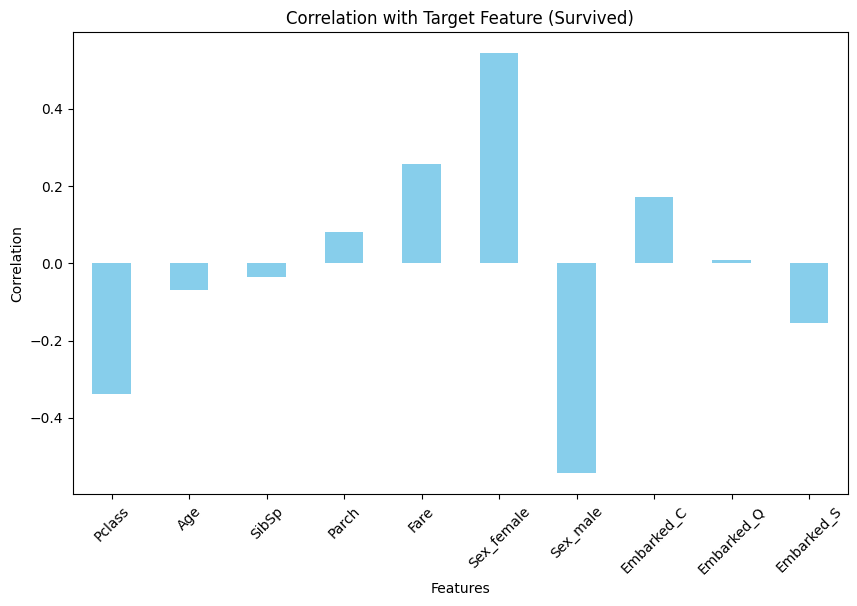

In [48]:
import seaborn as sns

#correlation_matrix = train_ds.corr()

correlation_with_target = train_ds.corrwith(target)

# Plot the correlation values
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Feature (Survived)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [49]:
test_ds=test_ds.drop(columns='Embarked_Q', axis=1)
train_ds=train_ds.drop(columns='Embarked_Q', axis=1)

## **Normalization (Min-Max scaling):

Scales the data between a specified range (usually 0 and 1).**

In [50]:
train_data_col=train_ds.columns
test_data_col=test_ds.columns

scaler=MinMaxScaler()
train_ds = scaler.fit_transform(train_ds)
test_ds = scaler.transform(test_ds)

train_ds = pd.DataFrame (train_ds , columns=[train_data_col])
test_ds  = pd.DataFrame (test_ds , columns=[test_data_col])

In [51]:
test_ds

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_S
0,1.0,0.428248,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0
1,1.0,0.585323,0.125,0.000000,0.013663,1.0,0.0,0.0,1.0
2,0.5,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0
3,1.0,0.334004,0.000,0.000000,0.016908,0.0,1.0,0.0,1.0
4,1.0,0.271174,0.125,0.166667,0.023984,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,1.0,0.375127,0.000,0.000000,0.015713,0.0,1.0,0.0,1.0
414,0.0,0.484795,0.000,0.000000,0.212559,1.0,0.0,1.0,0.0
415,1.0,0.478512,0.000,0.000000,0.014151,0.0,1.0,0.0,1.0
416,1.0,0.375127,0.000,0.000000,0.015713,0.0,1.0,0.0,1.0


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(train_ds, target, test_size=0.2, random_state=42)
accuracy_model = RandomForestClassifier()




In [54]:
param_grid={
    'n_estimators': [50, 75,  100,  150],
    'max_depth': [None, 10,15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search=GridSearchCV(estimator=accuracy_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_param=grid_search.best_params_
best_model=grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
accuracy

0.8156424581005587

In [55]:
best_param

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 75}

In [56]:
accuracy_model.fit(train_ds, target)
importance=best_model.feature_importances_
n=0
for i in importance:
    print(train_data_col[n],i)
    n=n+1


Pclass 0.11025254467442092
Age 0.16016473710181467
SibSp 0.04535340095441879
Parch 0.034765893425641625
Fare 0.20026939314628112
Sex_female 0.21587242538663384
Sex_male 0.20084798051283445
Embarked_C 0.014494404917689361
Embarked_S 0.017979219880265292


In [57]:
#cols=train_ds.columns
train_data_col

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_S'],
      dtype='object')

In [58]:
model = RandomForestClassifier(max_depth=10,min_samples_split=10, n_estimators=150)
model.fit(train_ds, target)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150)

In [59]:
y_pred = model.predict(test_ds)

In [60]:
submission=pd.DataFrame()
submission['PassengerId']=PassengerId
submission['Survived']=pd.Series(y_pred)

In [61]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


submission.to_csv('Titanic_Machine_Learning_from_Disaster.csv',index=False)
